In [1]:

import os
import torch
from transformers import Trainer, TrainingArguments, AutoTokenizer, AutoModel, pipeline, AutoModelForSequenceClassification
import numpy as np
from datasets import Dataset, load_metric
import pandas as pd
from transformers import TextClassificationPipeline

In [2]:

model = AutoModelForSequenceClassification.from_pretrained('../../../Files/models/ROBERTA_base/Posts/Fully2/checkpoint-920')


In [3]:
model.device

device(type='cpu')

In [6]:

model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name, max_length=512, padding='max_length', truncation=True, add_special_tokens = True, return_tensors='pt')
# model = AutoModelForSequenceClassification.from_pretrained(os.path.join('../../../Files/models/', args.model_dir))


In [5]:
test = pd.read_csv('../../../Files/Submissions/train/test2.csv', sep='|')



In [7]:
classifier = TextClassificationPipeline(model=model, tokenizer=tokenizer, truncation=True,  max_length=500, device=1, batch_size=128)

In [12]:
test2 = test[0:50000]

In [8]:
testlist = []
for i,j in test.iterrows():
    testlist.append(j['cleanText'])


In [12]:
results

[{'label': 'LABEL_0', 'score': 0.9969409108161926},
 {'label': 'LABEL_2', 'score': 0.9967551827430725},
 {'label': 'LABEL_2', 'score': 0.9932832717895508},
 {'label': 'LABEL_1', 'score': 0.9992520213127136},
 {'label': 'LABEL_1', 'score': 0.9285122752189636},
 {'label': 'LABEL_0', 'score': 0.9933638572692871},
 {'label': 'LABEL_1', 'score': 0.9932896494865417},
 {'label': 'LABEL_1', 'score': 0.9985242486000061},
 {'label': 'LABEL_2', 'score': 0.9640348553657532},
 {'label': 'LABEL_2', 'score': 0.9564090371131897},
 {'label': 'LABEL_1', 'score': 0.9991508722305298},
 {'label': 'LABEL_1', 'score': 0.9991939663887024},
 {'label': 'LABEL_1', 'score': 0.6407313346862793},
 {'label': 'LABEL_2', 'score': 0.9972792267799377},
 {'label': 'LABEL_1', 'score': 0.9988180994987488},
 {'label': 'LABEL_1', 'score': 0.9987359642982483},
 {'label': 'LABEL_2', 'score': 0.9973304271697998},
 {'label': 'LABEL_2', 'score': 0.9971279501914978},
 {'label': 'LABEL_2', 'score': 0.9873161315917969},
 {'label': '

In [9]:
#score each submisssion title
results = classifier(testlist)

In [10]:
for i, j in test.iterrows():
    test.at[i, 'pred_1'] = np.int64(results[i]['label'][-1])
    test.at[i, 'conf_1'] = results[i]['score']

In [16]:
test.to_csv('../../../Files/Submissions/train/Roberta_C2.csv', sep='|')

In [14]:
6577 / len(length)

0.004671997635942203

<AxesSubplot:ylabel='Frequency'>

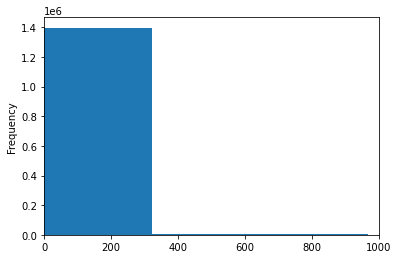

In [20]:
length.plot.hist(bins=100, xlim=(0,1000))

In [6]:
tokens = tokenizer.batch_encode_plus(test.cleanText.values.tolist(), add_special_tokens=True, return_attention_mask=True, padding=True, max_length=512, truncation=True, return_tensors='pt' )

In [9]:
len(tokens.input_ids)

1407749

In [10]:
maxs = 0
avg = 0
for i in tokens.input_ids:
    avg += len(i)
    if len(i) > maxs:
        maxs = len(i)

In [11]:
maxs

512

In [15]:
classifier = TextClassificationPipeline(model=model, device=1)

In [46]:
results = classifier(testlist[0:5000])

In [47]:
results

[{'label': 'LABEL_1', 'score': 0.9955306649208069},
 {'label': 'LABEL_1', 'score': 0.9955294728279114},
 {'label': 'LABEL_1', 'score': 0.994838297367096},
 {'label': 'LABEL_1', 'score': 0.9955246448516846},
 {'label': 'LABEL_0', 'score': 0.9849889278411865},
 {'label': 'LABEL_2', 'score': 0.9805868864059448},
 {'label': 'LABEL_1', 'score': 0.9138021469116211},
 {'label': 'LABEL_1', 'score': 0.9934065341949463},
 {'label': 'LABEL_2', 'score': 0.9208515882492065},
 {'label': 'LABEL_1', 'score': 0.995159924030304},
 {'label': 'LABEL_1', 'score': 0.9955143332481384},
 {'label': 'LABEL_1', 'score': 0.9954193830490112},
 {'label': 'LABEL_1', 'score': 0.833211362361908},
 {'label': 'LABEL_1', 'score': 0.9954127669334412},
 {'label': 'LABEL_1', 'score': 0.9934199452400208},
 {'label': 'LABEL_1', 'score': 0.9955339431762695},
 {'label': 'LABEL_1', 'score': 0.9955441355705261},
 {'label': 'LABEL_1', 'score': 0.9187488555908203},
 {'label': 'LABEL_1', 'score': 0.9926875829696655},
 {'label': 'LAB

In [13]:
model_name = 'bert-base-cased'
tokenizer = AutoTokenizer.from_pretrained(model_name, padding="max_length", truncation=True)

def tokenize_function(examples):
    return tokenizer(examples, padding="max_length", truncation=True)

In [14]:
model = AutoModelForSequenceClassification.from_pretrained('../../../Files/models/bert_base_cased_model/fully_trained/checkpoint-3237/')

In [31]:
dirs = 'Submissions/train/test_split_submission_r.pickle'

In [35]:
try: 
    files = os.listdir(os.path.join('../../../Files/', dirs))

    # remove any files that are not in the .pickle type 
    files = [f for f in files if f.endswith('.pickle')]
except FileNotFoundError:
    file = [dirs.split('/')[-1]]

In [4]:
df = pd.read_pickle('../../../Files/Submissions/train/test_split_submission_r.pickle')

In [5]:
df.head()

,author,created_utc,id,num_comments,permalink,score,selftext,subreddit,title,url,label,text,cleanText
0,Future_Khai,1606789344,k4bf5n,2,/r/aww/comments/k4bf5n/just_my_dog_hanging_wit...,1,,aww,"Just my dog hanging with his bros, Happy Howli...",https://i.imgur.com/vLNjOSH.jpg,1,"Just my dog hanging with his bros, Happy Howli...",dog hang bro happy howliday
1,Plotz50,1610128980,kt7wgq,6,/r/aww/comments/kt7wgq/cat_in_a_colosseum/,9,,aww,Cat in a colosseum,https://i.redd.it/euajbbxle5a61.jpg,1,Cat in a colosseum,cat colosseum
2,LegacyOfDepression,1608036052,kdl0qb,3,/r/aww/comments/kdl0qb/do_it_ike_last_kiss/,1,,aww,Do it ike last kiss.,https://i.redd.it/0y2ifp79jc561.jpg,1,Do it ike last kiss.,ike kiss
3,bejandianaandrei,1606611545,k2zqd5,0,/r/aww/comments/k2zqd5/whats_the_best_thing_af...,1,,aww,what's the best thing after a nap? another nap,https://v.redd.it/ymlbr0n9v2261,1,what's the best thing after a nap? another nap,s good thing nap nap
4,Naiiqiqhq,1609656203,kpfnra,1,/r/NoNewNormal/comments/kpfnra/how_the_fuck_do...,1,Why the fuck are you required to use mask on s...,NoNewNormal,How the fuck does all this make sense ?,https://www.reddit.com/r/NoNewNormal/comments/...,0,How the fuck does all this make sense ? Why th...,fuck sense fuck require use mask place place...


In [15]:
from transformers import TextClassificationPipeline

In [16]:
classifier = TextClassificationPipeline(model=model, tokenizer=tokenizer)

In [50]:
results = classifier(testlist[:100], top_k=2)

In [9]:
results[0]

[{'label': 'LABEL_1', 'score': 0.9958221912384033},
 {'label': 'LABEL_2', 'score': 0.00371171603910625},
 {'label': 'LABEL_0', 'score': 0.00046611326979473233}]

In [10]:
for i, j in test2.iterrows():
    test2.at[i, 'pred_1'] = np.int64(results[i][0]['label'][-1])
    test2.at[i, 'conf_1'] = results[i][0]['score']
    test2.at[i, 'pred_2'] = np.int64(results[i][1]['label'][-1])
    test2.at[i, 'conf_2'] = results[i][1]['score']

/var/folders/fh/yf9jwszj6d5_1_xhfz_l6k000000gn/T/ipykernel_51638/4264278197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2.at[i, 'pred_1'] = np.int64(results[i][0]['label'][-1])
/var/folders/fh/yf9jwszj6d5_1_xhfz_l6k000000gn/T/ipykernel_51638/4264278197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2.at[i, 'conf_1'] = results[i][0]['score']
/var/folders/fh/yf9jwszj6d5_1_xhfz_l6k000000gn/T/ipykernel_51638/4264278197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [17]:
test2.loc[ test['label'] == 1, 'label'] = 4
test2.loc[ test['label'] == 0, 'label'] = 1
test.loc[ test['label'] == 4, 'label'] = 0

In [14]:
import pandas as pd
import xgboost as xbg
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
def plot_results(y_test, y_pred, model ):
    acc = metrics.accuracy_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred, average='macro')
    y_pred_onehot = pd.get_dummies(y_pred)
    roc_auc = metrics.roc_auc_score(y_test, y_pred_onehot, multi_class='ovo')
    print('Model performance for {model}'.format(model=model))
    print('------------------------------------------------')
    print('Accuracy is ', acc)
    print('F1 is ', f1)
    print('ROC AUC Score is ', roc_auc)
    print('------------------------------------------------')

    metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()
    df = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred))
    df2 = df.div(df.sum(axis=1), axis=0)
    ax = sns.heatmap(df2)
    ax.set(xlabel='Predicted', ylabel='Actual', title=f'Confusion Matrix for {model}')
    plt.show()

Model performance for BERT
------------------------------------------------
Accuracy is  0.7
F1 is  0.6606848628125224
ROC AUC Score is  0.7680436117936118
------------------------------------------------


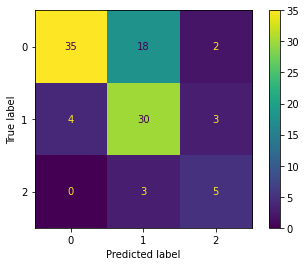

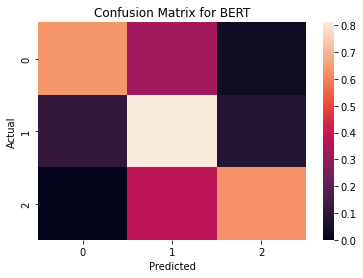

In [18]:
plot_results(test2['label'], test2['pred_1'], 'BERT')

### SLOW WAY, don't look here

In [66]:
from tqdm import tqdm
predictions = []
for i in tqdm(range(len(test))):
    predictions.append(classifier(test[i]))

  0%|          | 3500/1408474 [04:49<32:17:12, 12.09it/s] 


KeyboardInterrupt: 